In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

## Loading and REading 

In [2]:
### Parameters for DAS 
sample_rate = 25
dchan = 9.5714
ch_max = 4500  # max channel of each cable (4500 or 6000)
ch_itv=2  # channels are downsampled for faster picking

### Directories and files
raw_dir = '/fd1/QibinShi_data/akdas/qibin_data/'
out_dir = raw_dir + 'largerEQ_plots_test_picking_dec_ch' + str(ch_max) + '/'
record_time_file = 'recording_times_larger.csv'
qml = raw_dir + 'ak_Dec1_31_a120b065.xml'

In [3]:
### Read phase picks from the previous session
with h5py.File(out_dir + 'phase_picks.hdf5', 'r') as f: #filepaths should be 
    raw_picks = f["raw_alldata_picks"][:]
    one_picks = f["one_denoise_picks"][:]
    mul_picks = f["mul_denoise_picks"][:]
    pred_picks = f["predicted_picks"][:]
    array_dist = f["array_dist"][:]
    
### Read raw and denoised DAS
with h5py.File(raw_dir + 'KKFLStill2024_02_24.hdf5', 'r') as f:
    raw_quake_kkfls = f["raw_quake"][:, :4500, :] # original could be 500:5000, check 
    fk_quake_kkfls = f["fk_quake"][:, :4500, :]

with h5py.File(raw_dir + 'TERRAtill2024_02_24.hdf5', 'r') as f:
    raw_quake_terra = f["raw_quake"][:, :4500, :]
    fk_quake_terra = f["fk_quake"][:, :4500, :]


In [4]:
savedir = "/home/arose17/FM_Segmentation_DAS/src/data/pick_masking/"

In [5]:
# #save one_picks as a csv
# np.savetxt(savedir + 'p_mul_picks.csv', mul_picks[:,:,0, 0], delimiter=',', fmt='%s')


In [6]:
# np.savetxt(savedir + 's_mul_picks.csv', mul_picks[:,:,1, 0], delimiter=',', fmt='%s')


In [7]:
raw_quake_kkfls.shape
raw_quake_terra.shape

#flip the terra data on the channel axis, the number of ea
quakes = np.concatenate((raw_quake_kkfls[:, ::-1, :], raw_quake_terra), axis=1)


In [8]:
quakes.shape

(95, 9000, 1500)

In [9]:
pred_picks.shape

(95, 4500, 2)

In [11]:
### Bandpass filter
b, a = butter(4, (0.5, 12), fs=sampling_rate, btype='bandpass')
filt = filtfilt(b, a, quakes, axis=2)
rawdata = filt / np.std(filt, axis=(1,2), keepdims=True)  ## Rawdata w.r.t. Denoised 

In [12]:
#print(highpass_quakes.shape)

In [13]:
# plt.figure(figsize=(10, 6))

# for i in range(0,95):
#     plt.imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     plt.scatter(pred_picks[i,:,1]*25, np.arange(0,9000, 2))
#     plt.savefig(savedir + "pred_picks/" + 'predpick_' + str(i) + '.png')
#     plt.close()



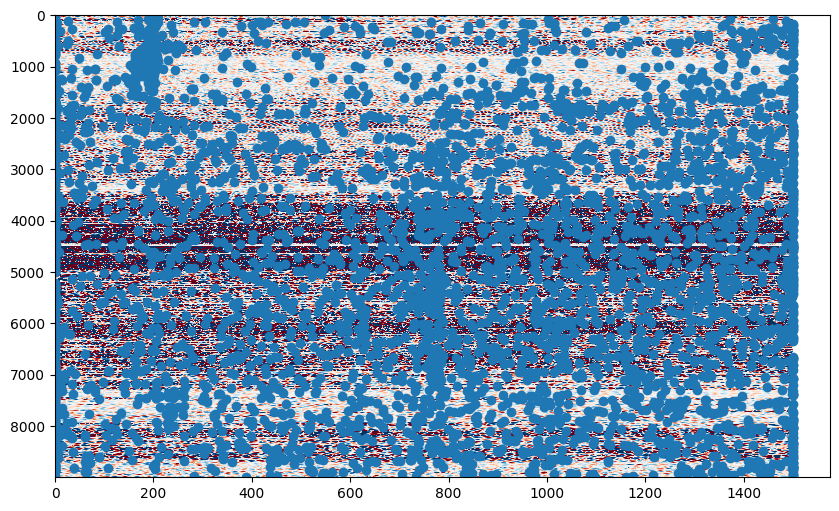

In [14]:
plt.figure(figsize=(10, 6))
plt.imshow(rawdata[45, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")

plt.scatter(one_picks[45,:,1,0]*25, np.arange(0,9000, 2))



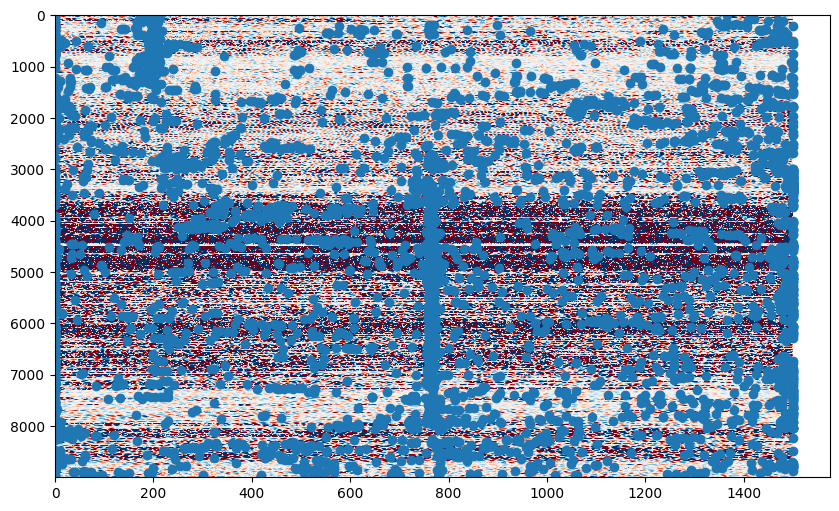

In [15]:
plt.figure(figsize=(10, 6))
plt.imshow(rawdata[45, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")

plt.scatter(mul_picks[45,:,1,0]*25, np.arange(0,9000, 2))



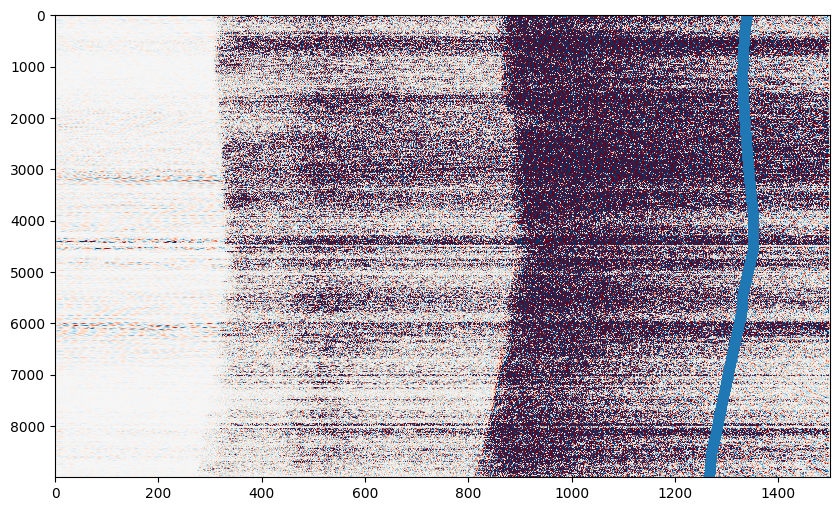

In [16]:
plt.figure(figsize=(10, 6))
plt.imshow(rawdata[32, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")

plt.scatter(pred_picks[32,:,1]*25, np.arange(0,9000, 2))



### For loops for finding which picks to utilize

In [17]:

# for i in range(0,95):
#     fig, axes = plt.subplots(2,1, figsize=(10, 10))
    
#     axes[0].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[0].scatter(pred_picks[i,:,0]*25, np.arange(0,9000, 2))
#     axes[0].set_title("pred_picks[i,:,0]")

#     axes[1].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[1].scatter(pred_picks[i,:,1]*25, np.arange(0,9000, 2))
#     axes[1].set_title("pred_picks[i,:,1]")

#     plt.savefig(savedir + "pred_picks/" + 'predpick_' + str(i) + '.png')
#     plt.close()

In [18]:

# for i in range(2,10):
#     fig, axes = plt.subplots(2,2, figsize=(10, 10))

#     axes[0,0].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[0,0].scatter(raw_picks[i,:, 0, 0]*25, np.arange(0,9000, 2))
#     axes[0,0].set_title("raw_picks[i,:,0,0]")

#     axes[1,0].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[1,0].scatter(raw_picks[i,:,1,0]*25, np.arange(0,9000, 2))
#     axes[1,0].set_title("raw_picks[i,:,1,0]")

#     axes[0,1].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[0,1].scatter(raw_picks[i,:, 0, 1]*25, np.arange(0,9000, 2))
#     axes[0,1].set_title("raw_picks[i,:,0,1]")

#     axes[1,1].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[1,1].scatter(raw_picks[i,:,1,1]*25, np.arange(0,9000, 2))
#     axes[1,1].set_title("raw_picks[i,:,1,1]")

#     plt.savefig(savedir + "raw_picks/" + 'rawpick_' + str(i) + '.png')
#     plt.close()

In [19]:
# for i in range(2,10):
#     fig, axes = plt.subplots(2,2, figsize=(10, 10))
#     axes[0,0].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[0,0].scatter(mul_picks[i,:, 0, 0]*25, np.arange(0,9000, 2))
#     axes[0,0].set_title("mul_picks[i,:,0,0]")

#     axes[1,0].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[1,0].scatter(mul_picks[i,:,1,0]*25, np.arange(0,9000, 2))
#     axes[1,0].set_title("mul_picks[i,:,1,0]")

#     axes[0,1].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[0,1].scatter(mul_picks[i,:, 0, 1]*25, np.arange(0,9000, 2))
#     axes[0,1].set_title("mul_picks[i,:,0,1]")

#     axes[1,1].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[1,1].scatter(mul_picks[i,:,1,1]*25, np.arange(0,9000, 2))
#     axes[1,1].set_title("mul_picks[i,:,1,1]")

#     plt.savefig(savedir + "mul_picks/" + 'mulpick_' + str(i) + '.png')
#     plt.close()

In [20]:
# for i in range(0,95):
#     fig, axes = plt.subplots(2,2, figsize=(10, 10))

#     axes[0,0].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[0,0].scatter(one_picks[i,:, 0, 0]*25, np.arange(0,9000, 2))
#     axes[0,0].set_title("one_picks[i,:,0,0]")

#     axes[1,0].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[1,0].scatter(one_picks[i,:,1,0]*25, np.arange(0,9000, 2))
#     axes[1,0].set_title("one_picks[i,:,1,0]")

#     axes[0,1].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[0,1].scatter(one_picks[i,:, 0, 1]*25, np.arange(0,9000, 2))
#     axes[0,1].set_title("one_picks[i,:,0,1]")

#     axes[1,1].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[1,1].scatter(one_picks[i,:,1,1]*25, np.arange(0,9000, 2))
#     axes[1,1].set_title("one_picks[i,:,1,1]")

#     plt.savefig(savedir + "one_picks/" + 'onepick_' + str(i) + '.png')
#     plt.close()

### For loop for plotting claned picks from other notebook

In [21]:
cleaned_p_waves = "/home/arose17/FM_Segmentation_DAS/src/data/pick_masking/cleaned_p_waves2.npy"
cleaned_s_waves = "/home/arose17/FM_Segmentation_DAS/src/data/pick_masking/cleaned_s_waves2.npy"

#open the numpy arrays
p_waves = np.load(cleaned_p_waves)
s_waves = np.load(cleaned_s_waves)

#create a for loop to plot the p waves and s waves 

In [22]:
p_waves.shape

(95, 4500)

In [23]:
#numpy array of likely unusable picks
alex_verfied = np.array([2, 3, 5, 6, 9, 12, 13, 17, 20, 23, 27, 28, 31, 33, 39, 42, 
                         44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 
                         59, 60, 61, 62, 63, 66, 67, 68, 69, 70, 72, 73, 74, 75, 
                         76, 77, 78, 79, 80, 83, 84, 91, 92, 93])

#find the picks from 0 to 95 that are not in alex_verfied
alex_verfied = np.setdiff1d(np.arange(0, 95), alex_verfied)
print(alex_verfied)

[ 0  1  4  7  8 10 11 14 15 16 18 19 21 22 24 25 26 29 30 32 34 35 36 37
 38 40 41 43 46 64 65 71 81 82 85 86 87 88 89 90 94]


KeyboardInterrupt: 

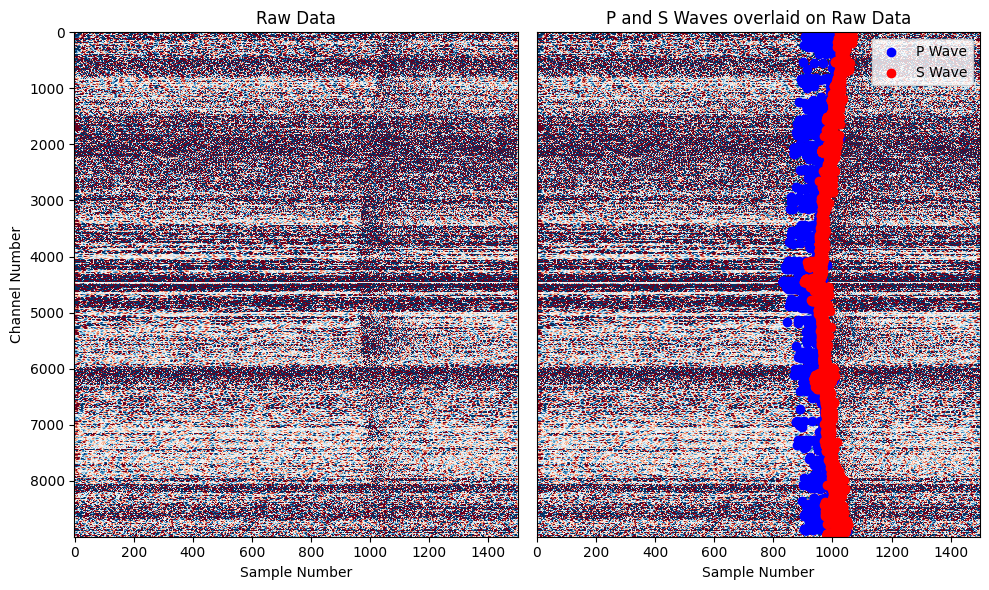

In [ ]:
# #create a for loop that takes only the i values from alex_verfied and plots the p and s waves over the raw data
# for i in alex_verfied:
#     fig, axes = plt.subplots(1,2, figsize=(10, 6))
#     axes[0].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[0].set_title("Raw Data")
#     axes[0].set_ylabel("Channel Number")
#     axes[0].set_xlabel("Sample Number")

#     axes[1].imshow(rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
#     axes[1].scatter(p_waves[i]*25, np.arange(0,9000, 2), color = 'blue')
#     axes[1].scatter(s_waves[i]*25, np.arange(0,9000, 2), color='red')    
#     axes[1].set_title("P and S Waves overlaid on Raw Data")
#     axes[1].legend(['P Wave', 'S Wave'])
#     axes[1].set_xlabel("Sample Number")
#     axes[1].set_yticks([])
#     plt.tight_layout()
#     plt.savefig("/home/arose17/FM_Segmentation_DAS/src/data/pick_masking/cleaned_picks_with_data/alex_verified_06042025/data_with_p_s_waves" + str(i) + '.png')
#     plt.close()

In [52]:
#import the masks generated by previous notebook
p_s_quake_masks = np.load("/home/arose17/FM_Segmentation_DAS/src/data/pick_masking/cleaned_picks_with_data/alex_verified_06042025/masks/p_s_quake_masks_06042025.npy")
p_wave_masks = np.load("/home/arose17/FM_Segmentation_DAS/src/data/pick_masking/cleaned_picks_with_data/alex_verified_06042025/masks/mask_p_waves_06042025.npy")
s_wave_masks = np.load("/home/arose17/FM_Segmentation_DAS/src/data/pick_masking/cleaned_picks_with_data/alex_verified_06042025/masks/mask_s_waves_06042025.npy")
#load the indices files
p_wave_indices = np.load("/home/arose17/FM_Segmentation_DAS/src/data/pick_masking/cleaned_picks_with_data/alex_verified_06042025/masks/p_wave_indices_06042025.npy")
s_wave_indices = np.load("/home/arose17/FM_Segmentation_DAS/src/data/pick_masking/cleaned_picks_with_data/alex_verified_06042025/masks/s_wave_indices_06042025.npy")
both_p_s_indices = np.load("/home/arose17/FM_Segmentation_DAS/src/data/pick_masking/cleaned_picks_with_data/alex_verified_06042025/masks/both_p_s_indices_06042025.npy")

#combined the indices into one array
combined_indices = np.concatenate((p_wave_indices, s_wave_indices, both_p_s_indices), axis=0)

print(combined_indices.shape)
print(combined_indices)

#combined the p_wave masks, s_wave masks and p_s_quake_masks into one array
combined_masks = np.concatenate((p_wave_masks, s_wave_masks, p_s_quake_masks), axis=0)

#create a for loop that takes only the i values from combined_indices and makes a new rawdata array with the earthquake data indexed in the specific order
new_rawdata = rawdata[combined_indices, :, :]

#duplicate every odd row and create an even row with the same data
new_combined = np.repeat(combined_masks, 2, axis=1)


new_combined.shape


(40,)
[36 37 94  1  7  8 10 11 14 15 16 19 22 25 26 29 30 34 35 38 40 41 43 46
 64 71 81 82 86 87 88 89 90  0  4 18 24 32 65 85]


(40, 9000, 1500)

In [60]:
import matplotlib.colors as mcolors

# Create a ListedColormap: 0 -> transparent, 1 -> orange
cmap_orange_transparent = mcolors.ListedColormap([(1,1,1,0), (1,0.5,0,1)])  # 0: transparent, 1: orange

# Example usage:
# plt.imshow(mask, cmap=cmap_orange_transparent, interpolation="none")

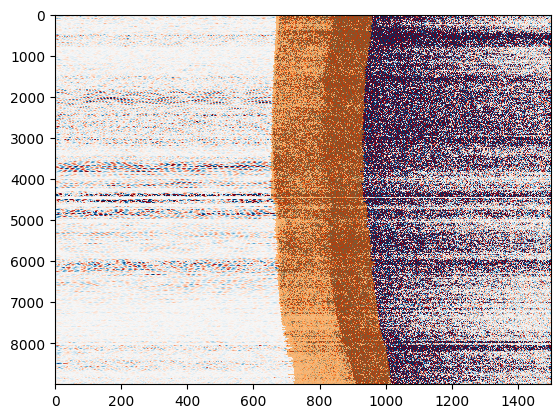

In [64]:
plt.imshow(new_rawdata[39, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
plt.imshow(new_combined[39,:,:], aspect='auto', cmap = cmap_orange_transparent, alpha=0.5, interpolation = "none")



In [66]:
#create a for loop that takes only the i values from alex_verfied and plots the p and s waves over the raw data
for i in range(0,len(new_rawdata[0])):
    label = combined_indices[i]
    fig, axes = plt.subplots(1,2, figsize=(10, 6))
    axes[0].imshow(new_rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
    axes[0].set_title("Raw Data")
    axes[0].set_ylabel("Channel Number")
    axes[0].set_xlabel("Sample Number")

    axes[1].imshow(new_rawdata[i, :, :], aspect='auto', cmap = "RdBu", vmin = -0.5, vmax = 0.5, interpolation = "none")
    axes[1].imshow(new_combined[i, :, :], aspect='auto', cmap = cmap_orange_transparent, alpha=0.5, interpolation = "none")
    axes[1].set_title("P and S Waves overlaid on Raw Data")
    axes[1].set_xlabel("Sample Number")
    axes[1].set_yticks([])
    plt.tight_layout()
    plt.savefig("/home/arose17/FM_Segmentation_DAS/src/data/pick_masking/cleaned_picks_with_data/alex_verified_06042025/masks/final_plots/data_with_p_s_waves" + str(label) + '.png')
    plt.close()

IndexError: index 40 is out of bounds for axis 0 with size 40